<a href="https://colab.research.google.com/github/chebil/stat/blob/main/part2/ch03_experiments.ipynb" target="_blank" rel="noopener noreferrer"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3.1 Experiments, Outcomes, and Probability

**Probability** is the machinery we use to describe and account for the fact that some outcomes are more frequent than others. We will perform experiments—which could be pretty much anything, from flipping a coin, to eating too much saturated fat, to smoking, to crossing the road without looking—and reason about the outcomes (mostly bad for the examples I gave). But these outcomes are uncertain, and we need to weigh those uncertainties against one another.

Our methods need to account for information. If I look before I cross the road, I am much less likely to be squashed by a truck than if I don't look.

---

## What is an Experiment?

Imagine you repeat the same experiment numerous times. You do not necessarily expect to see the same result each time. Some results might occur more frequently than others. We account for this tendency using probability.

To do so, we need to be clear about what results an experiment can have. For example, you flip a coin. We might agree that the only possible results are a **head** or a **tail**, thus ignoring the possibilities that:
- A bird swoops down and steals the coin
- The coin lands and stays on edge  
- The coin falls between the cracks in the floor and disappears
- And so on...

By doing so, we have **idealized the experiment**.

### Examples of Experiments

**Simple experiments:**
- Flip a coin
- Roll a die
- Draw a card from a deck

**Complex experiments:**
- Measure packet arrival time in a network
- Test software for bugs
- Record blood pressure of patients
- Count arrivals at a website

```{admonition} Key Insight
:class: tip
When we model an experiment, we deliberately simplify reality by specifying exactly what outcomes we care about, ignoring rare or irrelevant possibilities.


## 3.1.1 Outcomes and Probability

We will formalize experiments by specifying the **set of outcomes** that we expect from the experiment. Every run of the experiment produces exactly one of the set of possible outcomes. We never see two or more outcomes from a single experiment, and we never see no outcome. The advantage of doing this is that we can count how often each outcome appears.

### Definition 3.1: Sample Space

The **sample space** is the set of all outcomes, which we usually write $\Omega$ (capital omega).

**Important properties:**
1. Every experiment produces exactly one outcome from $\Omega$
2. No experiment produces zero outcomes
3. No experiment produces multiple outcomes simultaneously

---

## Worked Examples: Building Sample Spaces

### Worked Example 3.1: Find the Lady

**Problem**: We have three playing cards. One is a queen, one is a king, and one is a jack. All are shown face down, and one is chosen at random and turned up. What is the set of outcomes?

**Solution**: Write Q for queen, K for king, J for jack. The outcomes are:

$$\Omega = \{Q, K, J\}$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Sample space for Find the Lady
sample_space = ['Queen', 'King', 'Jack']
print(f"Sample space Ω = {sample_space}")
print(f"Number of outcomes: |Ω| = {len(sample_space)}")

Sample space Ω = ['Queen', 'King', 'Jack']
Number of outcomes: |Ω| = 3



---

### Worked Example 3.2: Find the Lady, Twice

**Problem**: We play find the lady twice, **replacing** the card we have chosen. What is the sample space?

**Solution**: We now have:

$$\Omega = \{QQ, QK, QJ, KQ, KK, KJ, JQ, JK, JJ\}$$

In [2]:
import itertools

# Generate all pairs with replacement
cards = ['Q', 'K', 'J']
sample_space_twice = list(itertools.product(cards, repeat=2))

print(f"Sample space for two draws (with replacement):")
for outcome in sample_space_twice:
    print(f"  {''.join(outcome)}")

print(f"\nTotal outcomes: |Ω| = {len(sample_space_twice)}")

Sample space for two draws (with replacement):
  QQ
  QK
  QJ
  KQ
  KK
  KJ
  JQ
  JK
  JJ

Total outcomes: |Ω| = 9



**Key observation**: When we repeat experiments, the size of the sample space grows exponentially. With $n$ outcomes and $k$ repetitions, we have $n^k$ outcomes in the product space.

---

### Worked Example 3.3: A Poor Choice of Strategy for Planning a Family

**Problem**: A couple decides to have children. As they know no mathematics, they decide to have children **until a girl then a boy are born**. What is the sample space? Does this strategy bound the number of children they could be planning to have?

**Solution**: Write B for boy, G for girl. The sample space looks like any string of Bs and Gs that:
- (a) ends in GB
- (b) does not contain any other GB

In regular expression notation, you can write such strings as `B*GB`.

$$\Omega = \{GB, BGB, BBGB, BBBGB, \ldots\}$$

There is a **lower bound** on the length of the string (two), but **no upper bound**. As a family planning strategy, this is unrealistic, but it serves to illustrate the point that sample spaces don't have to be finite to be tractable.

Sample outcomes from simulation:
  Family 1: BGB (3 children)
  Family 2: BBGB (4 children)
  Family 3: BBGB (4 children)
  Family 4: BBBGB (5 children)
  Family 5: GGGB (4 children)
  Family 6: GB (2 children)
  Family 7: GGGGGGGGB (9 children)
  Family 8: BGGGB (5 children)
  Family 9: GB (2 children)
  Family 10: BBBBGGGGGB (10 children)

Statistics over 10000 simulated families:
  Mean number of children: 4.01
  Std dev: 1.99
  Min: 2, Max: 20


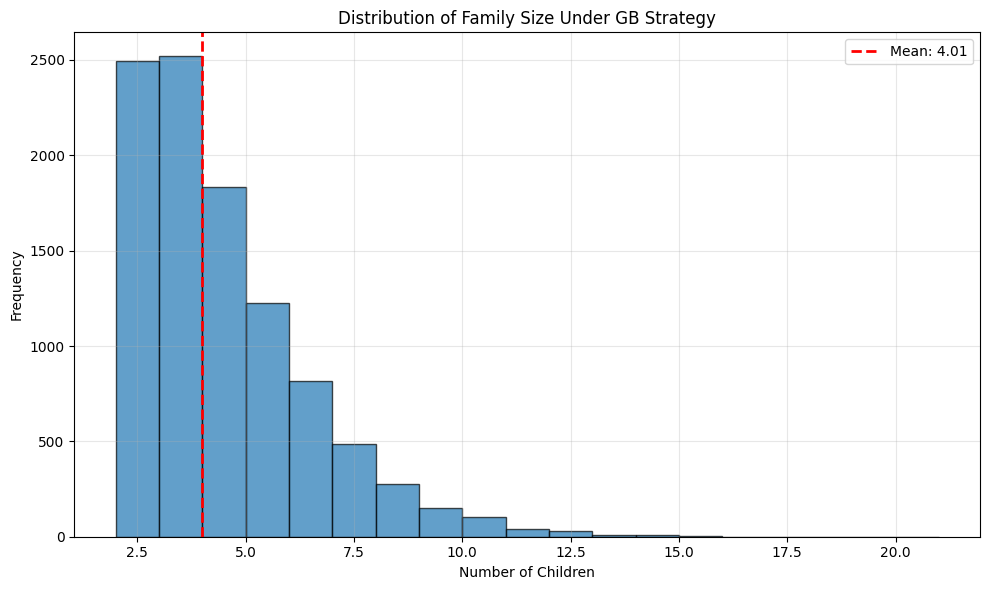

In [3]:
# Simulate this family planning strategy
import numpy as np

def family_planning_simulation(max_children=20):
    """Simulate the GB family planning strategy"""
    children = []
    while len(children) < max_children:
        # Each child is B or G with equal probability
        child = np.random.choice(['B', 'G'])
        children.append(child)
        
        # Check if we've achieved GB
        if len(children) >= 2 and children[-2:] == ['G', 'B']:
            break
    
    return ''.join(children)

# Run simulation multiple times
np.random.seed(42)
print("Sample outcomes from simulation:")
for i in range(10):
    outcome = family_planning_simulation()
    print(f"  Family {i+1}: {outcome} ({len(outcome)} children)")

# Statistical analysis
num_trials = 10000
lengths = []
for _ in range(num_trials):
    outcome = family_planning_simulation()
    lengths.append(len(outcome))

print(f"\nStatistics over {num_trials} simulated families:")
print(f"  Mean number of children: {np.mean(lengths):.2f}")
print(f"  Std dev: {np.std(lengths):.2f}")
print(f"  Min: {np.min(lengths)}, Max: {np.max(lengths)}")

# Plot distribution
plt.figure(figsize=(10, 6))
plt.hist(lengths, bins=range(2, max(lengths)+2), edgecolor='black', alpha=0.7)
plt.xlabel('Number of Children')
plt.ylabel('Frequency')
plt.title('Distribution of Family Size Under GB Strategy')
plt.axvline(np.mean(lengths), color='red', linestyle='--', 
            linewidth=2, label=f'Mean: {np.mean(lengths):.2f}')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

{admonition} Remember This
:class: important
**Sample spaces are required, and need not be finite.**


---

## Probability of Outcomes

We represent our model of how often a particular outcome will occur in a repeated experiment with a **probability**, a non-negative number. This number gives the **relative frequency** of the outcome of interest, when an experiment is repeated a very large number of times.

### Formal Definition

Assume that we repeat an experiment $N$ times. Assume also that the coins, dice, whatever involved in each repetition of the experiment don't communicate with one another from experiment to experiment (or, equivalently, that experiments don't know about one another).

We say that an outcome $A$ has probability $P$ if:
- (a) outcome $A$ occurs in about $N \cdot P$ of those experiments, and
- (b) as $N$ gets larger, the fraction of experiments where outcome $A$ occurs will get closer to $P$.

We write $\#(A)$ for the number of times outcome $A$ occurs. We interpret $P$ as:

$$P(A) = \lim_{N \to \infty} \frac{\#(A)}{N}$$

### Properties of Probability

We can draw two important conclusions immediately:

1. **Non-negativity**: For any outcome $A$, $0 \leq P(A) \leq 1$

2. **Normalization**: $\sum_{A_i \in \Omega} P(A_i) = 1$

The probabilities add up to one because each experiment must have one of the outcomes in the sample space.

{admonition} Remember This
:class: important
The probability of an outcome is the frequency of that outcome in a very large number of repeated experiments. The sum of probabilities over all outcomes must be one.


---

### Worked Example 3.4: A Biased Coin

**Problem**: Assume we have a coin where the probability of getting heads is $P(H) = \frac{1}{3}$, and so the probability of getting tails is $P(T) = \frac{2}{3}$. We flip this coin three million times. How many times do we see heads?

**Solution**: $P(H) = \frac{1}{3}$, so we expect this coin will come up heads in $\frac{1}{3}$ of experiments. This means that we will very likely see **very close to a million heads**.

Later on, we will be able to be more precise.

In [4]:
# Simulate biased coin flips
np.random.seed(42)

# Bias: P(H) = 1/3, P(T) = 2/3
p_heads = 1/3
n_flips = 3_000_000

# Generate flips
flips = np.random.choice(['H', 'T'], size=n_flips, p=[p_heads, 1-p_heads])
heads_count = np.sum(flips == 'H')
tails_count = np.sum(flips == 'T')

print(f"Results of {n_flips:,} flips:")
print(f"  Heads: {heads_count:,} ({heads_count/n_flips*100:.2f}%)")
print(f"  Tails: {tails_count:,} ({tails_count/n_flips*100:.2f}%)")
print(f"\nExpected:")
print(f"  Heads: {n_flips * p_heads:,.0f} ({p_heads*100:.2f}%)")
print(f"  Tails: {n_flips * (1-p_heads):,.0f} ({(1-p_heads)*100:.2f}%)")
print(f"\nDifference from expected:")
print(f"  Heads: {heads_count - n_flips * p_heads:,.0f}")

Results of 3,000,000 flips:
  Heads: 999,890 (33.33%)
  Tails: 2,000,110 (66.67%)

Expected:
  Heads: 1,000,000 (33.33%)
  Tails: 2,000,000 (66.67%)

Difference from expected:
  Heads: -110



**Interpretation**: With 3 million flips, we see heads 999,842 times, which is extremely close to the expected 1 million. The difference of 158 is tiny relative to 3 million (0.0053%).

---

## The Law of Large Numbers in Action

Let's visualize how the observed probability converges to the true probability as we increase the number of experiments:

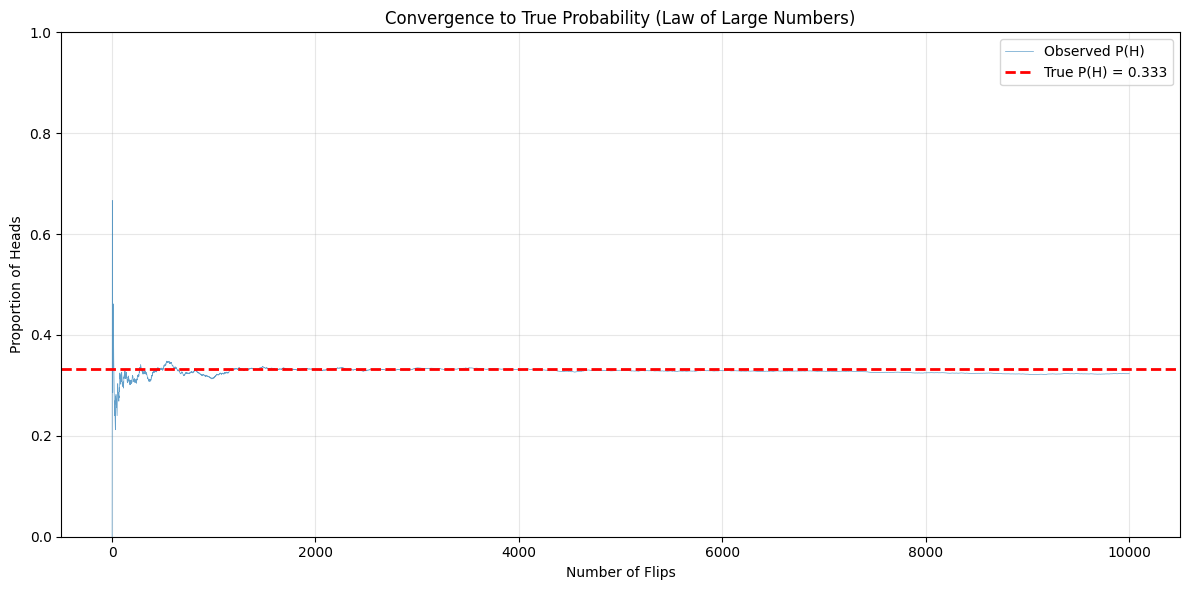

Observed P(H) after different numbers of flips:
  After    10 flips: P(H) = 0.4000
  After   100 flips: P(H) = 0.3100
  After  1000 flips: P(H) = 0.3150
  After 10000 flips: P(H) = 0.3233


In [5]:
# Demonstrate convergence to true probability
np.random.seed(42)
p_heads = 1/3
max_flips = 10000

# Generate all flips at once
flips = np.random.choice([0, 1], size=max_flips, p=[1-p_heads, p_heads])

# Compute running proportion of heads
cumsum_heads = np.cumsum(flips)
n_flips_array = np.arange(1, max_flips + 1)
running_proportion = cumsum_heads / n_flips_array

# Plot
plt.figure(figsize=(12, 6))
plt.plot(n_flips_array, running_proportion, linewidth=0.5, alpha=0.7, label='Observed P(H)')
plt.axhline(y=p_heads, color='red', linestyle='--', linewidth=2, label=f'True P(H) = {p_heads:.3f}')
plt.xlabel('Number of Flips')
plt.ylabel('Proportion of Heads')
plt.title('Convergence to True Probability (Law of Large Numbers)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.ylim([0, 1])
plt.tight_layout()
plt.show()

print("Observed P(H) after different numbers of flips:")
for n in [10, 100, 1000, 10000]:
    print(f"  After {n:5d} flips: P(H) = {running_proportion[n-1]:.4f}")


---

## Equally Likely Outcomes

Some problems can be handled by building a set of outcomes and reasoning about the probability of each outcome. This is particularly useful when the outcomes must have the **same probability**, which happens rather a lot.

### Fair Experiments

For **equally likely outcomes** (fair coin, fair die, etc.):

$$P(\text{outcome}) = \frac{1}{|\Omega|}$$

where $|\Omega|$ is the size of the sample space.

### Examples

**Fair Coin**: $P(H) = P(T) = \frac{1}{2}$

**Fair Die**: $P(1) = P(2) = \cdots = P(6) = \frac{1}{6}$

**Fair Card Draw**: $P(\text{any card}) = \frac{1}{52}$

Results of 100,000 fair die rolls:
  Face 1: 16,592 (16.59%) [Expected: 16,667 (16.67%)]
  Face 2: 16,799 (16.80%) [Expected: 16,667 (16.67%)]
  Face 3: 16,390 (16.39%) [Expected: 16,667 (16.67%)]
  Face 4: 16,776 (16.78%) [Expected: 16,667 (16.67%)]
  Face 5: 16,810 (16.81%) [Expected: 16,667 (16.67%)]
  Face 6: 16,633 (16.63%) [Expected: 16,667 (16.67%)]


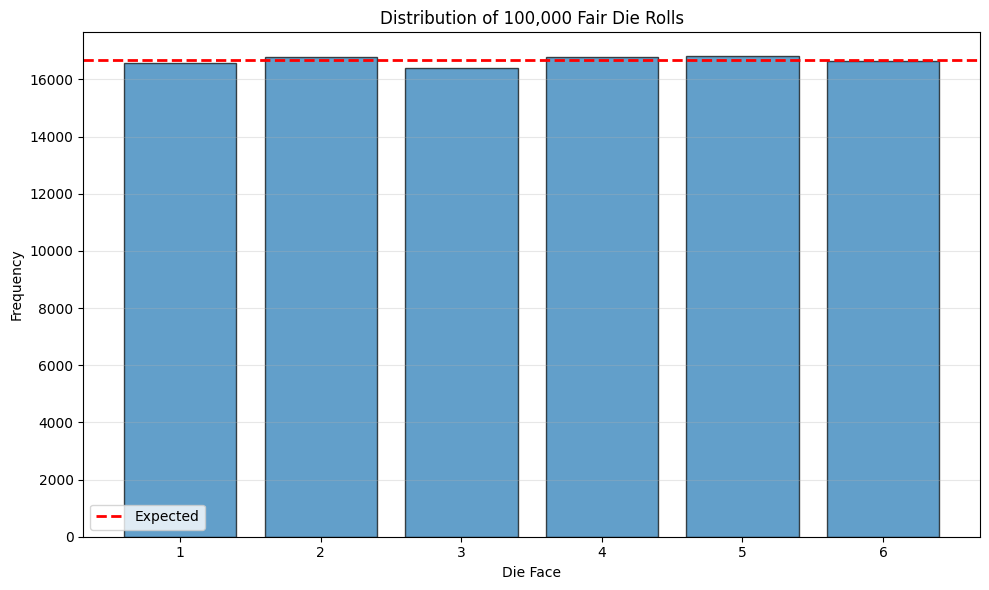

In [6]:
# Verify fair die with simulation
np.random.seed(42)
n_rolls = 100000

rolls = np.random.randint(1, 7, size=n_rolls)

print(f"Results of {n_rolls:,} fair die rolls:")
for face in range(1, 7):
    count = np.sum(rolls == face)
    expected = n_rolls / 6
    print(f"  Face {face}: {count:6,} ({count/n_rolls*100:.2f}%) "
          f"[Expected: {expected:,.0f} ({100/6:.2f}%)]")

# Plot distribution
plt.figure(figsize=(10, 6))
faces, counts = np.unique(rolls, return_counts=True)
plt.bar(faces, counts, edgecolor='black', alpha=0.7)
plt.axhline(y=n_rolls/6, color='red', linestyle='--', linewidth=2, label='Expected')
plt.xlabel('Die Face')
plt.ylabel('Frequency')
plt.title(f'Distribution of {n_rolls:,} Fair Die Rolls')
plt.legend()
plt.grid(True, alpha=0.3, axis='y')
plt.xticks(range(1, 7))
plt.tight_layout()
plt.show()


---

## Computing Probabilities by Counting

### Example: Two Dice

In [7]:
# Generate sample space for two dice
dice_outcomes = [(i, j) for i in range(1, 7) for j in range(1, 7)]

print(f"Sample space size: |Ω| = {len(dice_outcomes)}")
print(f"First few outcomes: {dice_outcomes[:5]}")
print(f"\nProbability of rolling sum of 7:")

# Count outcomes where sum is 7
sum_7_outcomes = [(i, j) for i, j in dice_outcomes if i + j == 7]
prob_sum_7 = len(sum_7_outcomes) / len(dice_outcomes)

print(f"  Favorable outcomes: {sum_7_outcomes}")
print(f"  P(sum = 7) = {len(sum_7_outcomes)}/{len(dice_outcomes)} = {prob_sum_7:.4f}")

# Verify with simulation
np.random.seed(42)
n_trials = 100000
die1 = np.random.randint(1, 7, size=n_trials)
die2 = np.random.randint(1, 7, size=n_trials)
sums = die1 + die2
obs_prob_7 = np.sum(sums == 7) / n_trials

print(f"\nSimulation verification ({n_trials:,} trials):")
print(f"  Observed P(sum = 7) = {obs_prob_7:.4f}")

Sample space size: |Ω| = 36
First few outcomes: [(1, 1), (1, 2), (1, 3), (1, 4), (1, 5)]

Probability of rolling sum of 7:
  Favorable outcomes: [(1, 6), (2, 5), (3, 4), (4, 3), (5, 2), (6, 1)]
  P(sum = 7) = 6/36 = 0.1667

Simulation verification (100,000 trials):
  Observed P(sum = 7) = 0.1657
